<a href="https://colab.research.google.com/github/MargaritaLomteva/-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачайте материалы к занятию.
Проанализируйте ряды и сделайте их стационарными.
Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [3]:
import pandas as pd

In [4]:
international_airline_passengers = pd.read_csv("/content/drive/MyDrive/1._Лекция_знакомство с временными рядами.zip (Unzipped Files)/international-airline-passengers.csv")
monthly_car_sales_in_quebec_1960 = pd.read_csv("/content/drive/MyDrive/1._Лекция_знакомство с временными рядами.zip (Unzipped Files)/monthly-car-sales-in-quebec-1960.csv")
monthly_sales_of_company_x_jan_6 = pd.read_csv("/content/drive/MyDrive/1._Лекция_знакомство с временными рядами.zip (Unzipped Files)/monthly-sales-of-company-x-jan-6.csv")


In [7]:
international_airline_passengers.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
monthly_car_sales_in_quebec_1960.head()

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [11]:
monthly_sales_of_company_x_jan_6.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
all_series = {"international-airline-passengers": international_airline_passengers["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"],
    "monthly-car-sales-in-quebec-1960": monthly_car_sales_in_quebec_1960["Count"],
    "monthly-sales-of-company-x-jan-6": monthly_sales_of_company_x_jan_6["Count"]

}

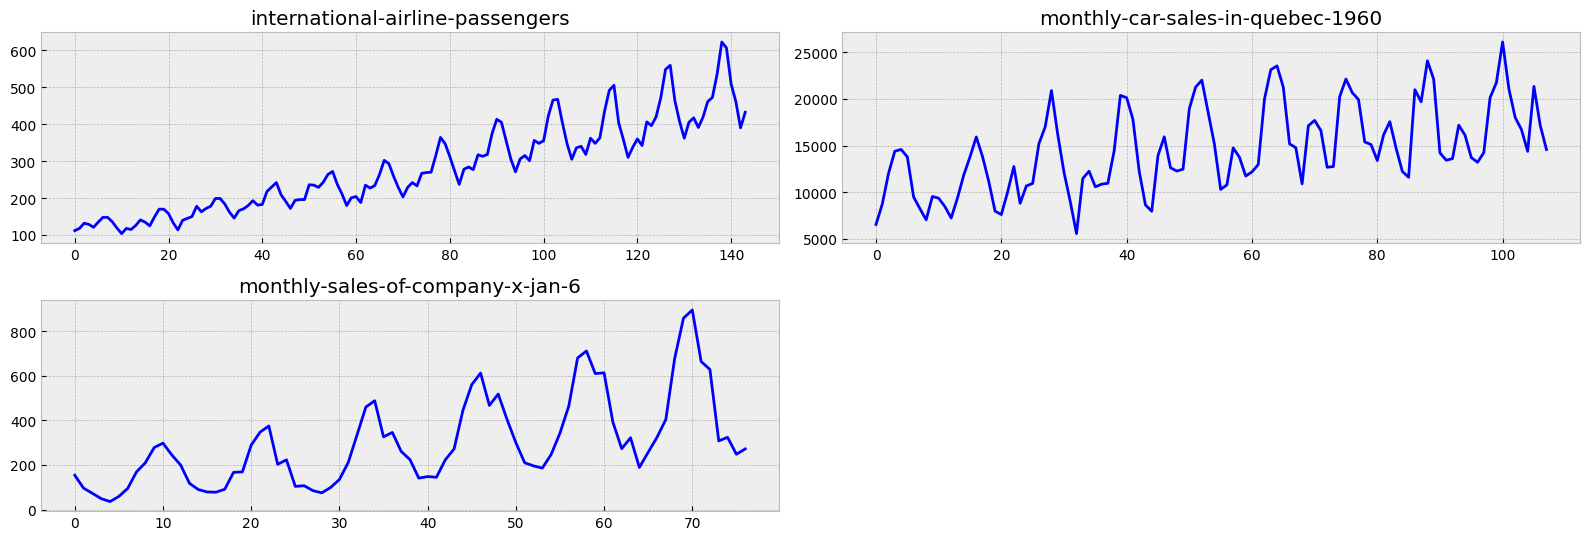

In [14]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [15]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

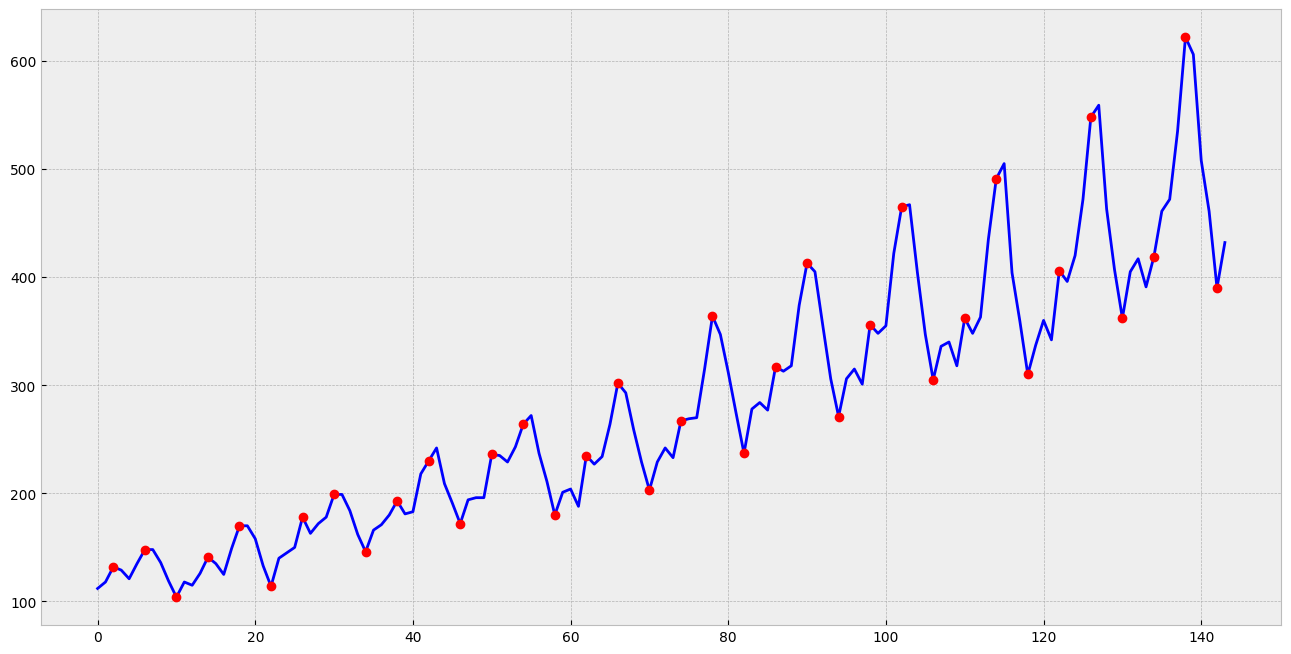

In [17]:
plot_ts_and_points( international_airline_passengers["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"], 2, 4)


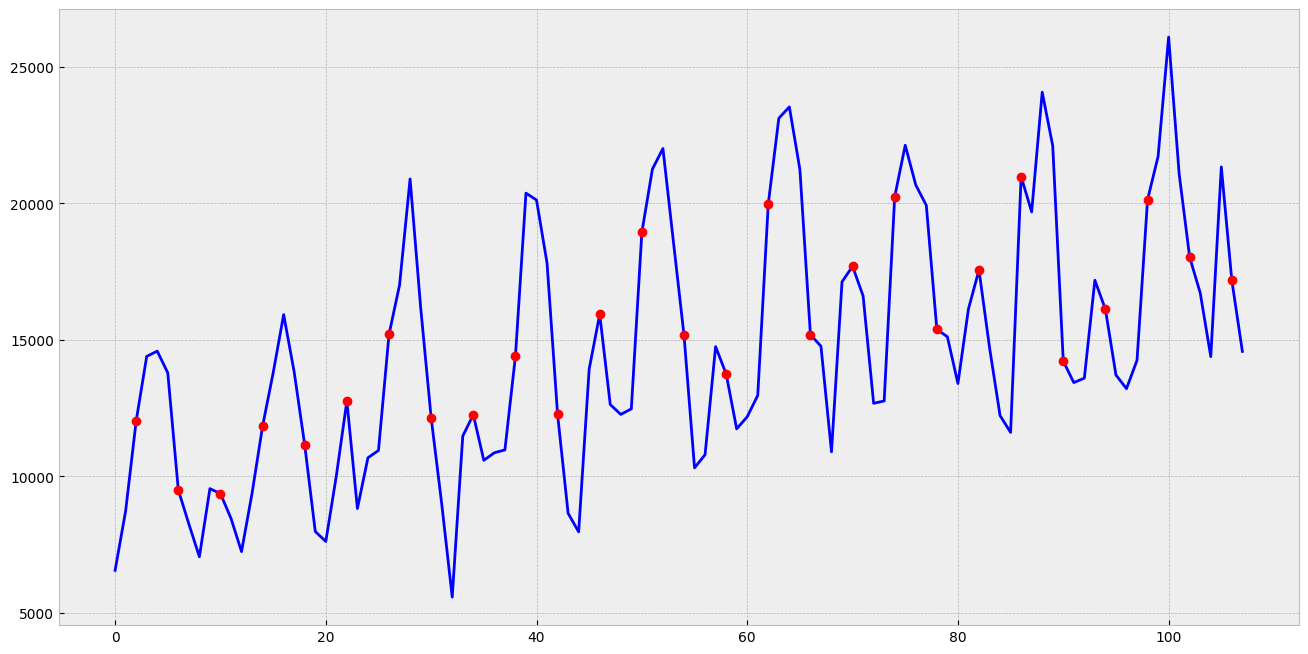

In [19]:
plot_ts_and_points(monthly_car_sales_in_quebec_1960["Count"], 2, 4)

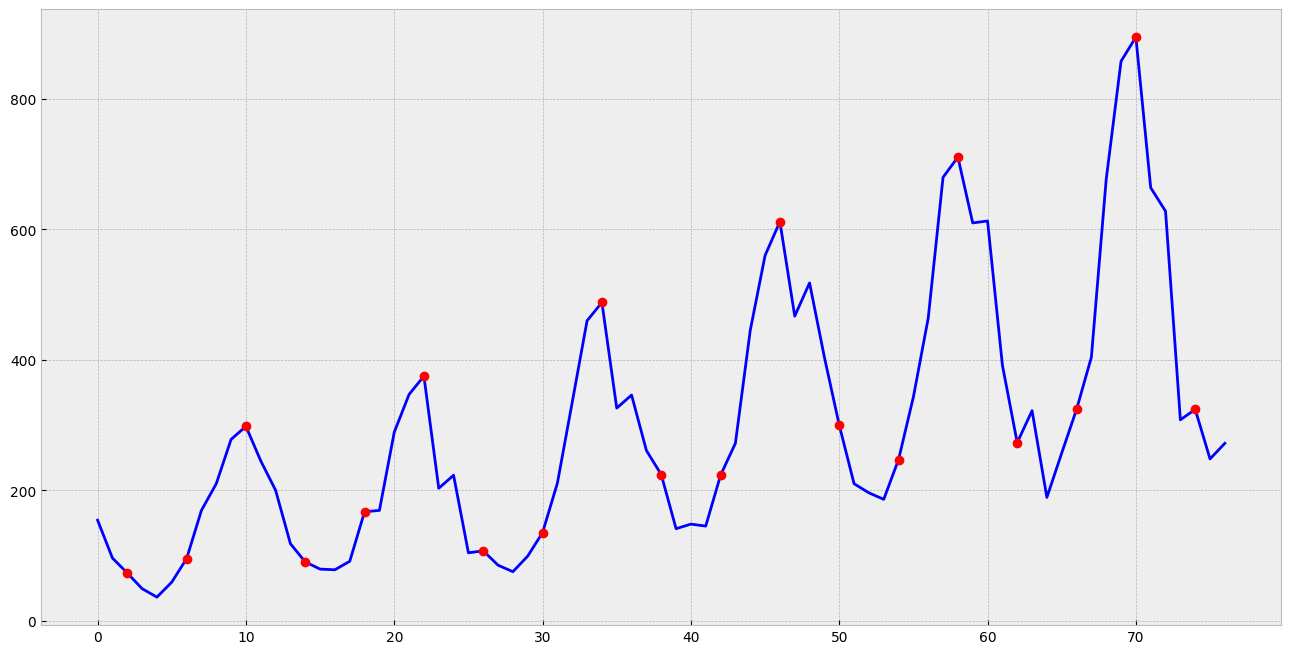

In [20]:
plot_ts_and_points(monthly_sales_of_company_x_jan_6["Count"],2 ,4)

Нормализуем дисперсию

In [21]:
from scipy.stats import boxcox

In [50]:
series0 = boxcox(all_series["international-airline-passengers"], 0)
series1 = boxcox(all_series["monthly-car-sales-in-quebec-1960"], 0)
series2 = boxcox(all_series["monthly-sales-of-company-x-jan-6"], 0)

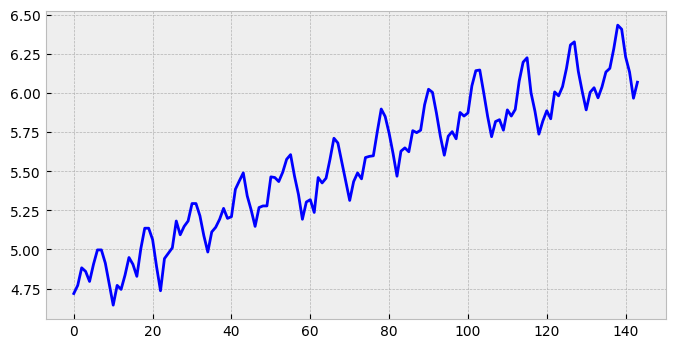

In [57]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series0, color='blue')

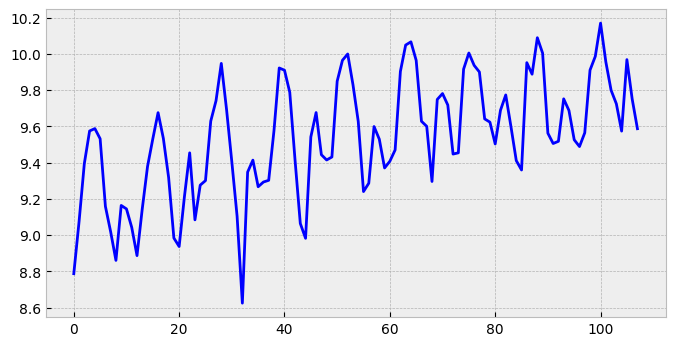

In [52]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series1, color='blue')

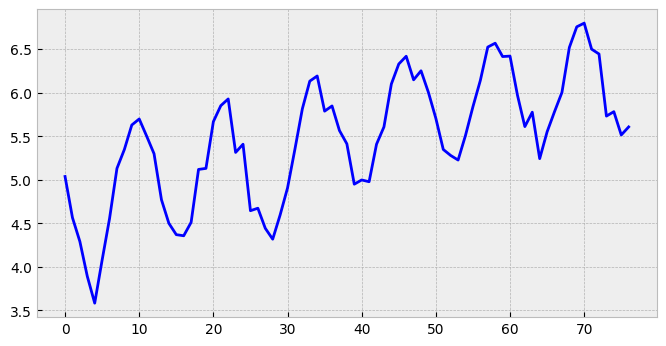

In [53]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series2, color='blue')

Дифференцируем

In [54]:
import numpy as np

In [70]:
series00 = np.diff(series0, 1)

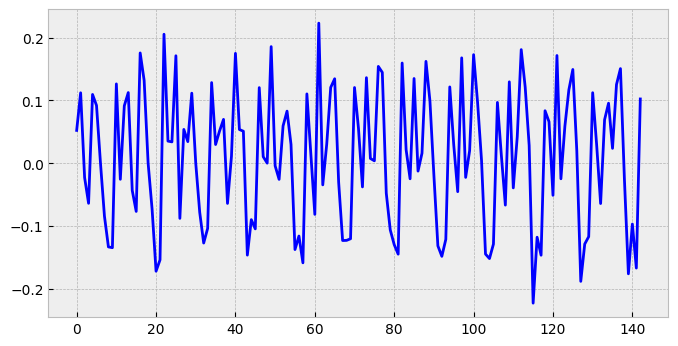

In [73]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series00, color='blue')

In [74]:
series11 = np.diff(series1, 1)

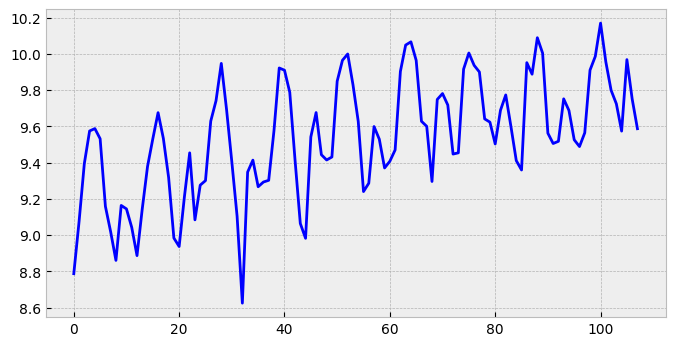

In [65]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series1, color='blue')

In [75]:
series22 = np.diff(series2, 1)

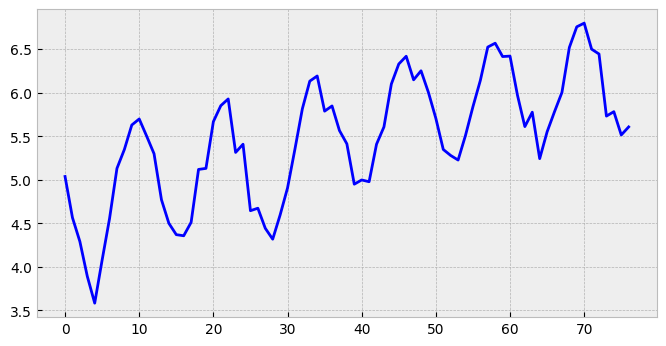

In [76]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series2, color='blue')

Тест Дики-Фуллера

In [68]:
from statsmodels.tsa.stattools import adfuller

In [41]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [78]:
test_stationarity(all_series["international-airline-passengers"])

Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


In [79]:
test_stationarity(all_series["monthly-car-sales-in-quebec-1960"])

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [81]:
 test_stationarity(all_series["monthly-sales-of-company-x-jan-6"])


Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Коррелограммы

In [82]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [83]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


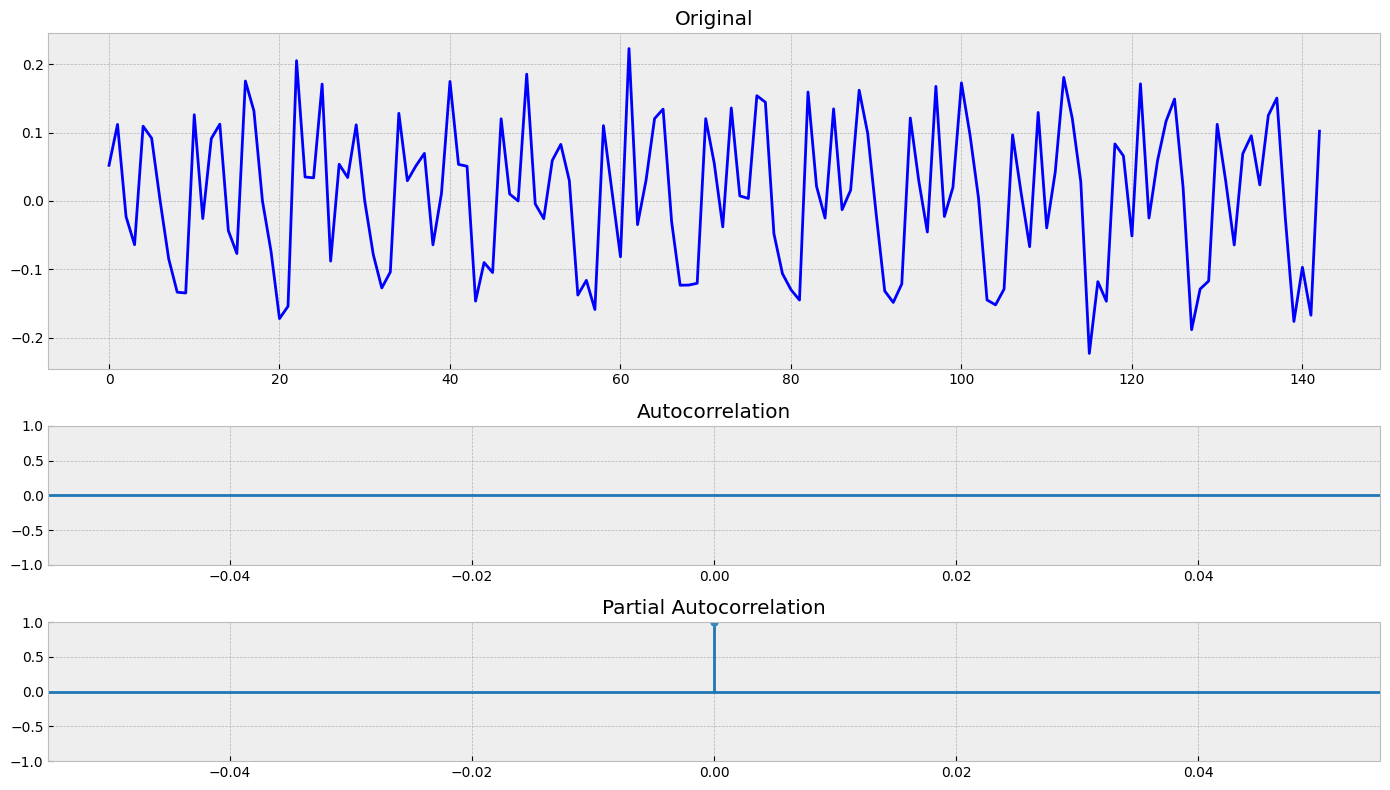

In [88]:
tsplot(series00)

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


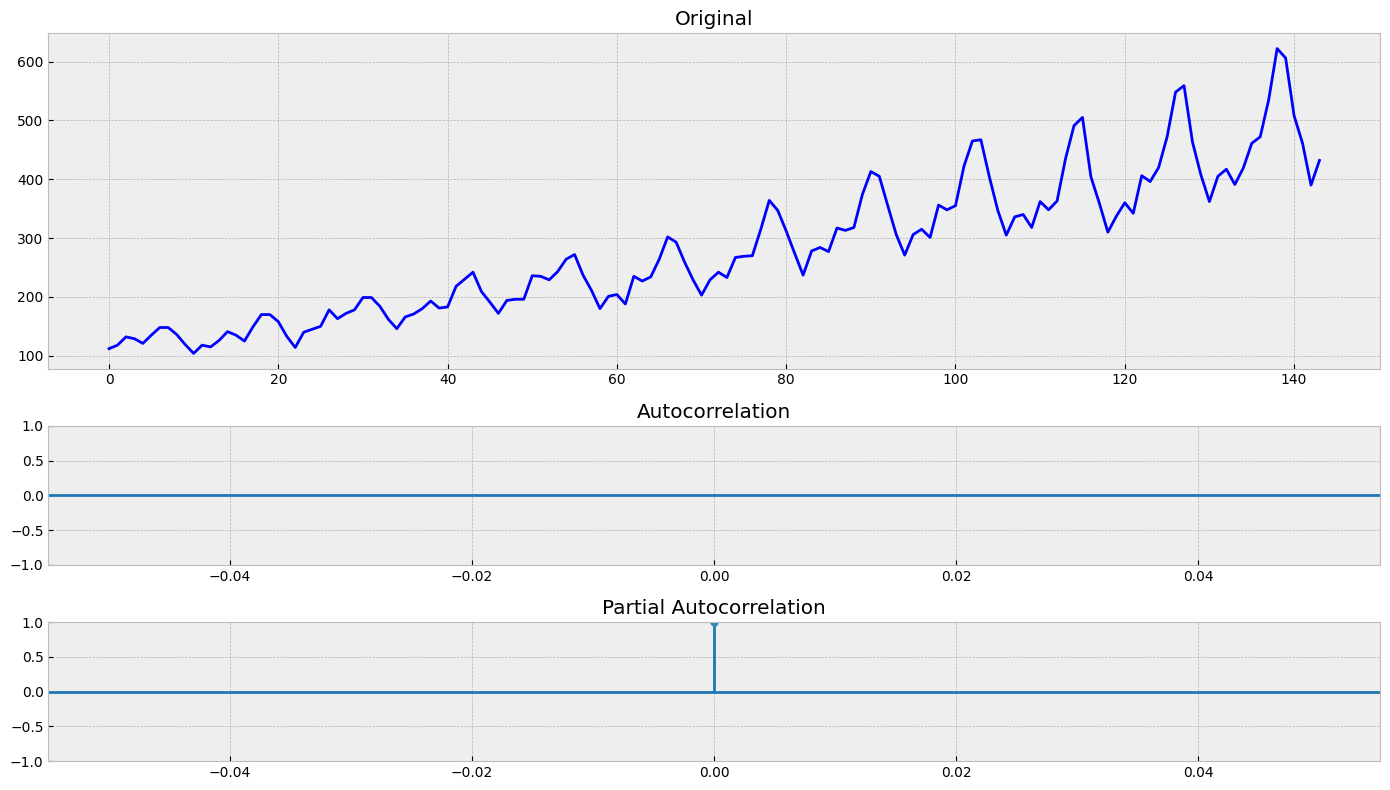

In [84]:
tsplot(all_series["international-airline-passengers"])

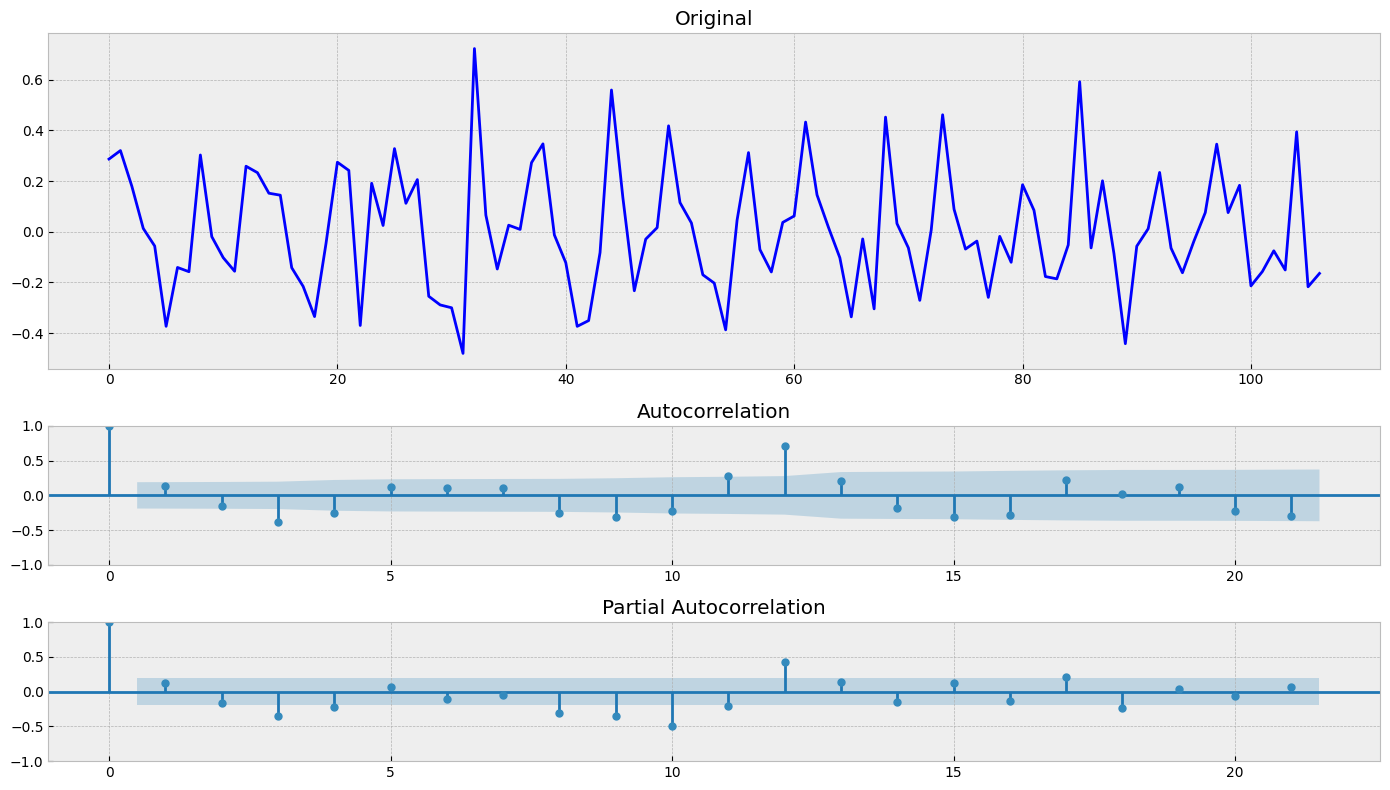

In [89]:
tsplot(series11)

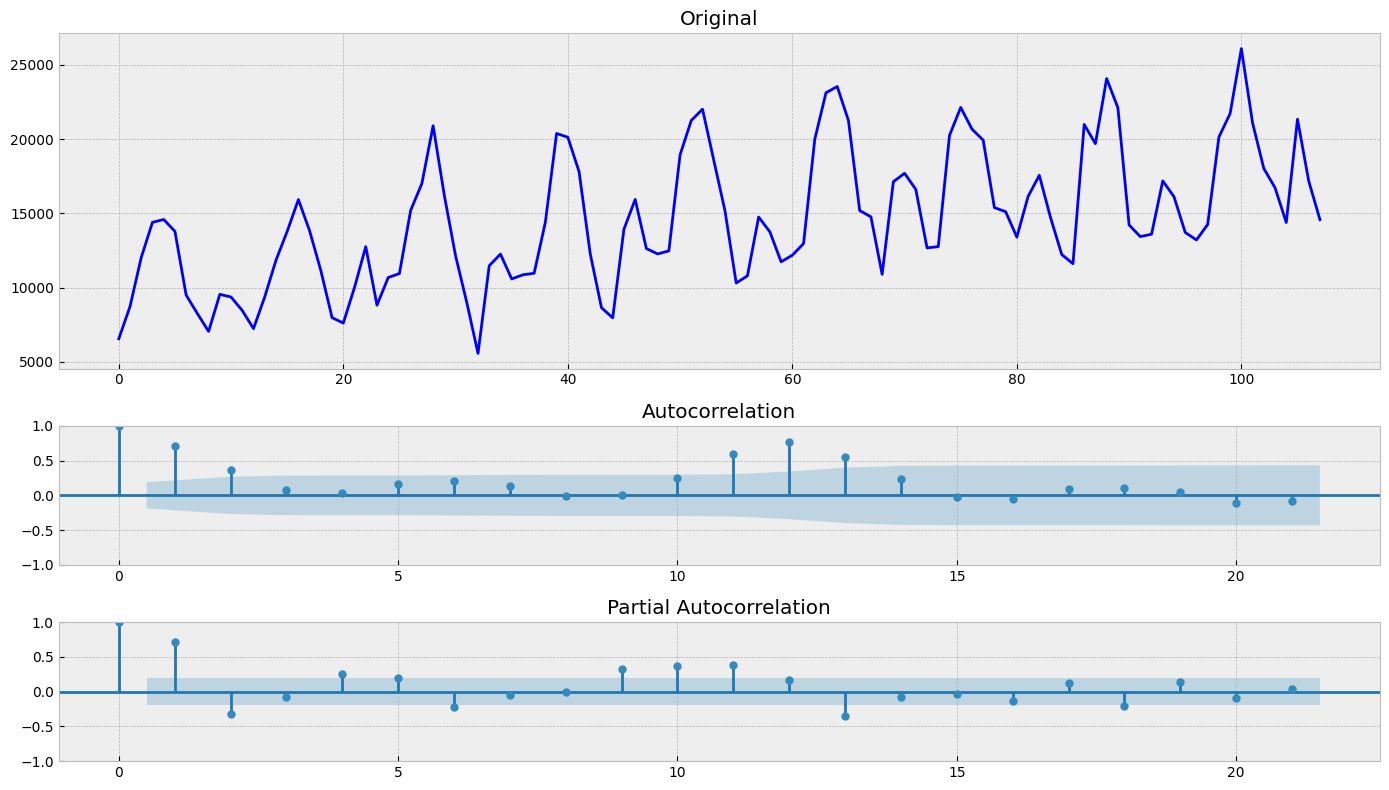

In [85]:
tsplot(all_series["monthly-car-sales-in-quebec-1960"])

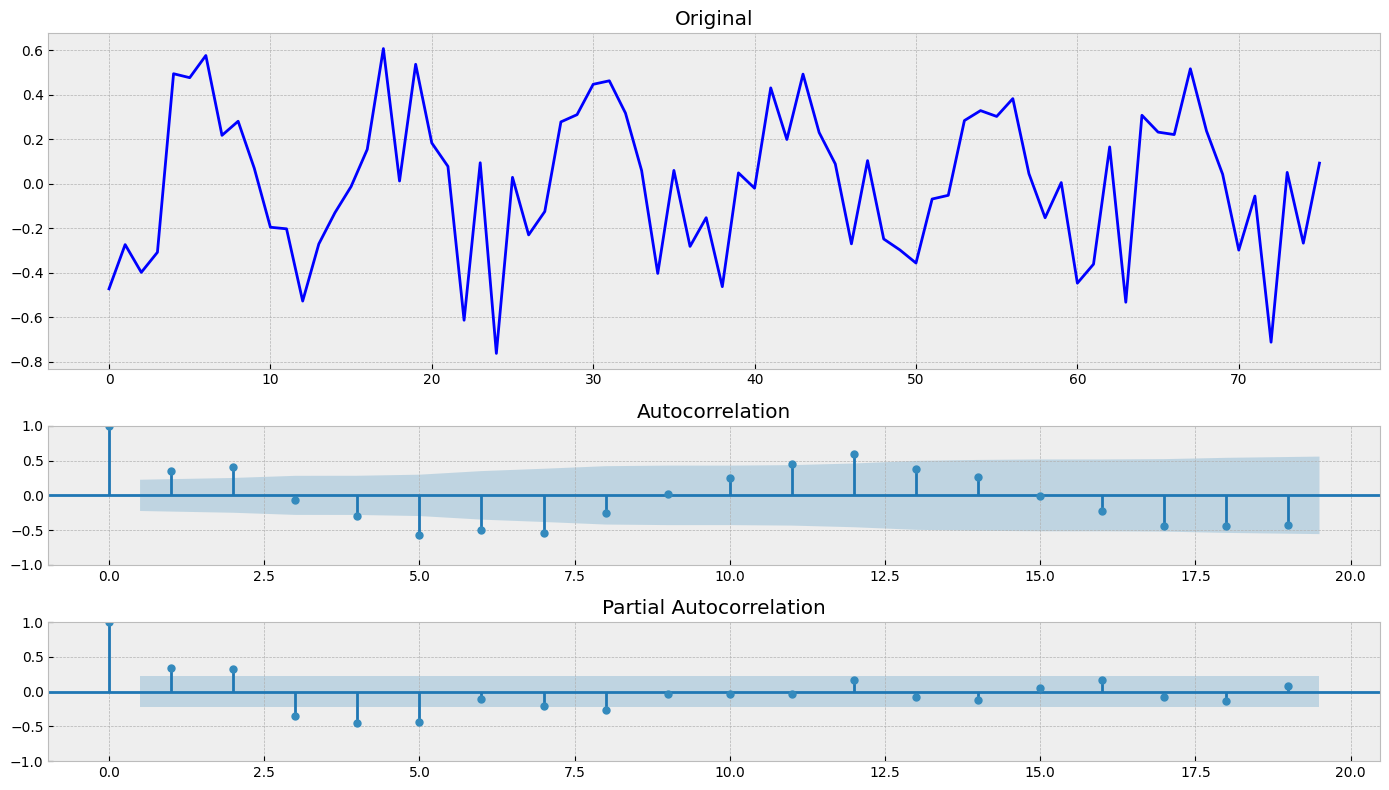

In [91]:
tsplot(series22)

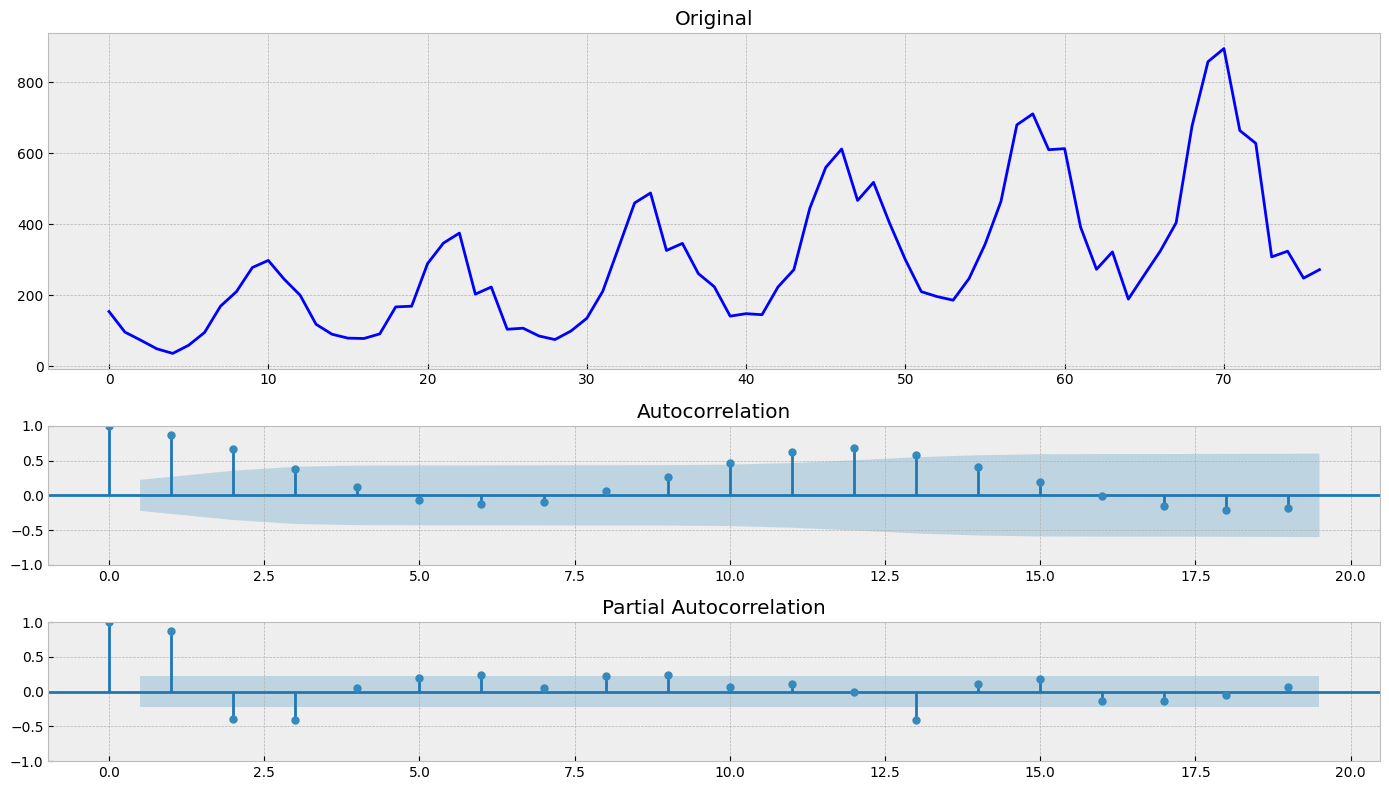

In [86]:
tsplot(all_series["monthly-sales-of-company-x-jan-6"])